# This is a notebook which helps understand OT on signed measures, using "---" method

## Trivial example

In [47]:
from utils.Visualizations import *
import numpy as np

n_p = 4
n_q = 4
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = np.array([1.0,-1.0,0.0,0.0])
q = np.array([0.0,0.0,-1.0,1.0])

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f1(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [48]:
K_t : np.ndarray = np.exp(C / (-eps))

### Positives

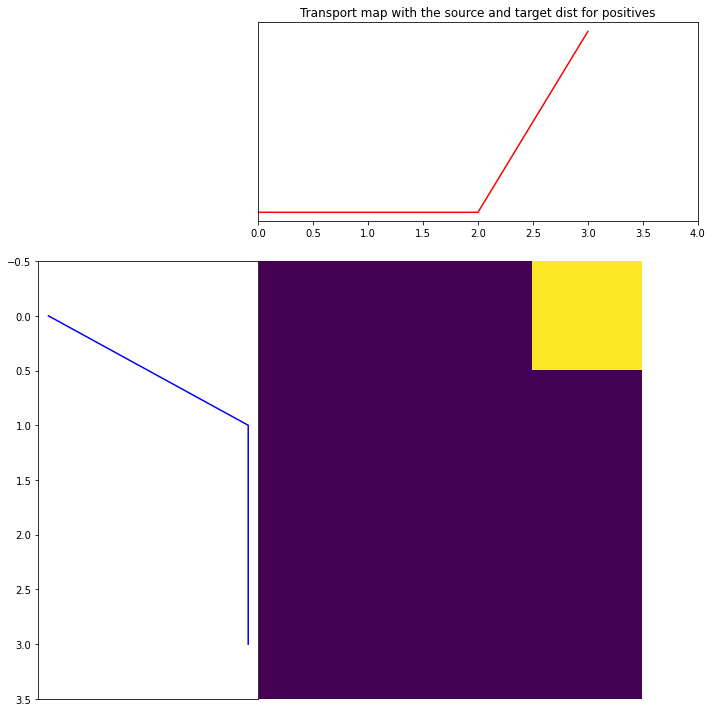

In [54]:
transport_plan_pos, transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_pos, q_pos, T_plan_pos,'Transport map with the source and target dist for positives')
plt.show()

### Negatives

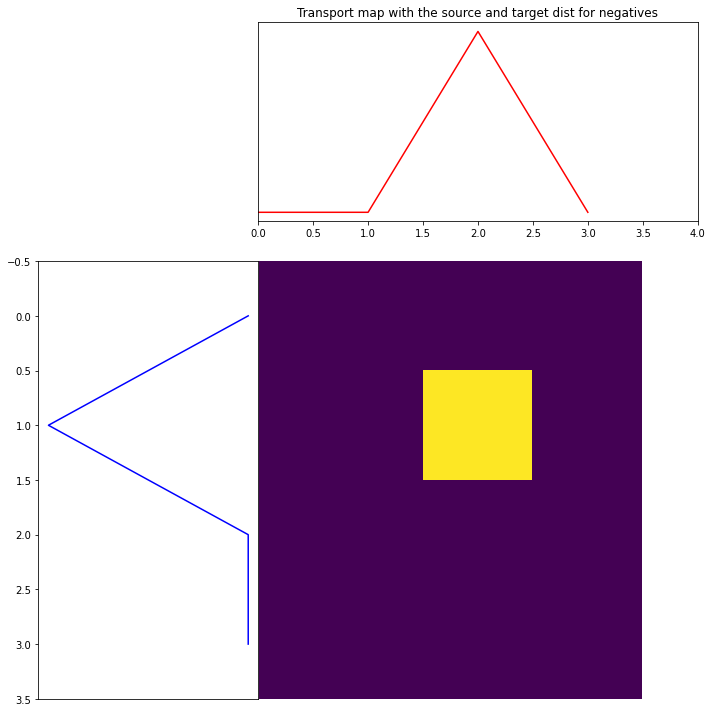

In [53]:
transport_plan_neg, transport_cost_neg = calc_transport_pot_emd(p_neg, q_neg, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_neg, q_neg, T_plan_neg,'Transport map with the source and target dist for negatives')
plt.show()

### United

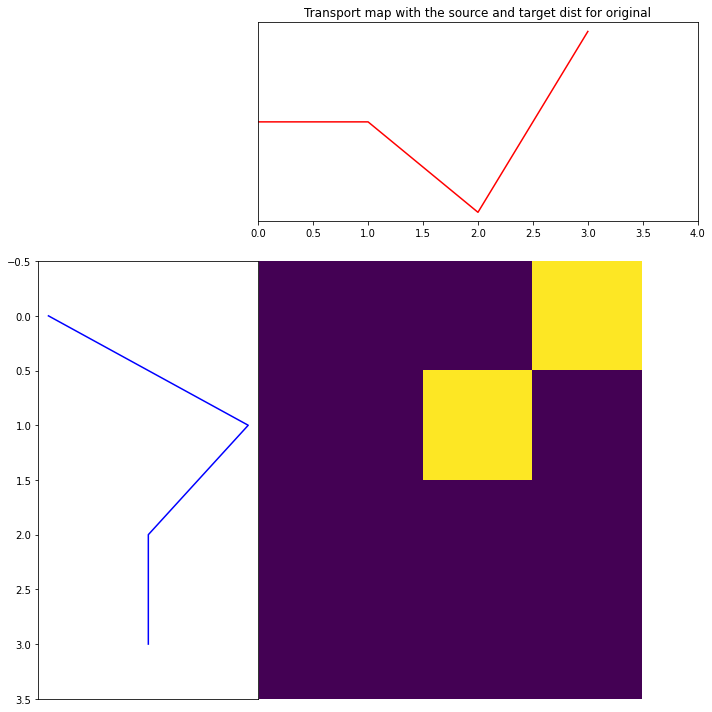

In [56]:
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan_pos + transport_plan_neg,'Transport map with the source and target dist for original')
plt.show()

## Example on gaussian distributions

In [60]:
n_p = 100
n_q = 100
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [61]:
K_t : np.ndarray = np.exp(C / (-eps))

In [62]:
transport_plan_pos, Transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)

### Positives

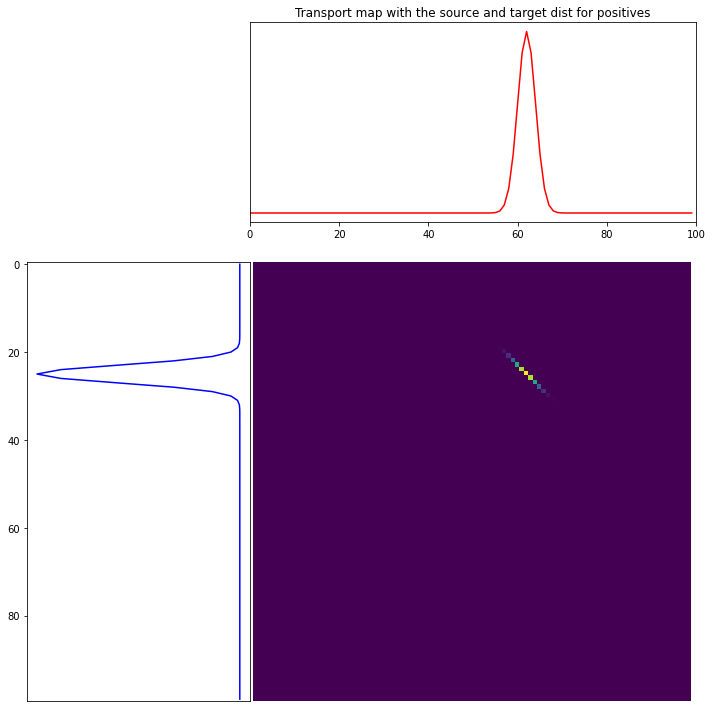

In [64]:
transport_plan_pos, transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_pos, q_pos, transport_plan_pos,'Transport map with the source and target dist for positives')
plt.show()

### Negatives

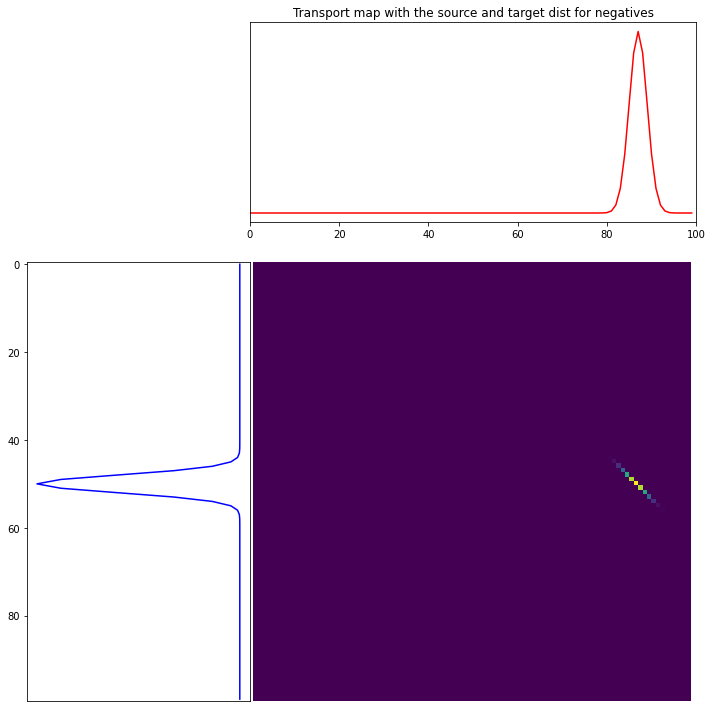

In [66]:
transport_plan_neg, transport_cost_neg = calc_transport_pot_emd(p_neg, q_neg, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_neg, q_neg, transport_plan_neg,'Transport map with the source and target dist for negatives')
plt.show()

### United

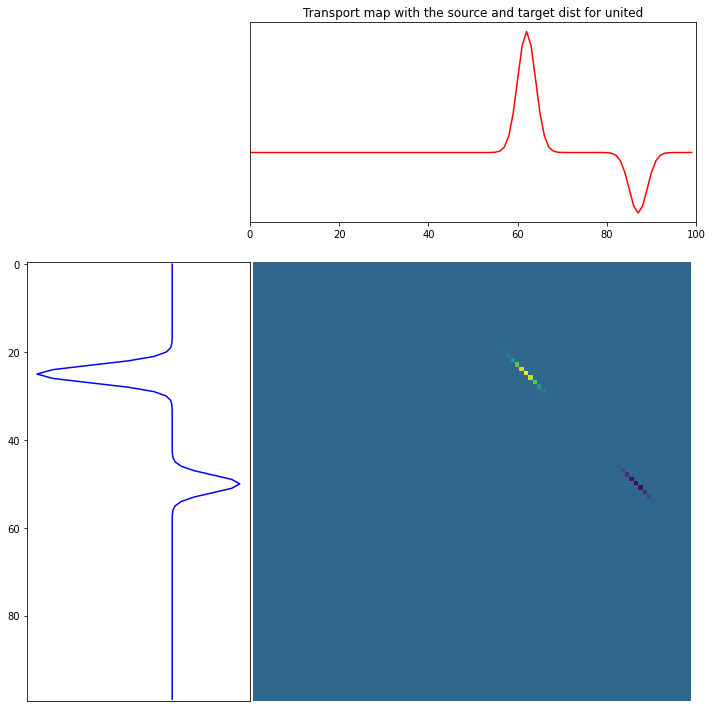

In [68]:
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan_pos - transport_plan_neg,'Transport map with the source and target dist for united')
plt.show()